In [1]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

# Importing the dataset

In [2]:
df=pd.read_csv("CC GENERAL.csv")

In [3]:
print(df.head())

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

# General Informations

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df=df.drop("CUST_ID", axis=1)

# Preprocessing

In [6]:
print(df.isnull().sum())

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [7]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(),inplace=True)
print(df.isnull().sum())

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


In [8]:
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(),inplace=True)
print(df.isnull().sum())

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


In [9]:
print(df.isnull().sum().sum())

0


In [10]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.282473,1733.143852,844.906767,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.646702,2895.063757,2332.792322,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [11]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled=pd.DataFrame(df_scaled)

In [12]:
df_scaled.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03
mean,4.195651e-16,1.209548e-14,-9.278518e-16,3.916048e-15,2.275424e-15,5.693056e-15,-3.716084e-16,2.021052e-15,2.353921e-16,5.729495e-16,-7.151821e-16,-3.570713e-15,6.739178e-15,-2.421651e-16,-5.480408e-17,-2.201566e-15,1.556446e-14
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00
min,-7.516398e-01,-3.703271e+00,-4.695519e-01,-3.569340e-01,-4.545762e-01,-4.667856e-01,-1.221758e+00,-6.786608e-01,-9.169952e-01,-6.753489e-01,-4.760698e-01,-5.917959e-01,-1.221479e+00,-5.986883e-01,-3.621989e-01,-5.255510e-01,-4.122768e+00
25%,-6.900078e-01,4.904486e-02,-4.510006e-01,-3.569340e-01,-4.545762e-01,-4.667856e-01,-1.014125e+00,-6.786608e-01,-9.169952e-01,-6.753489e-01,-4.760698e-01,-5.515646e-01,-7.954727e-01,-4.662913e-01,-2.889613e-01,-5.255510e-01,3.606795e-01
50%,-3.320286e-01,5.180838e-01,-3.004541e-01,-3.340396e-01,-3.561562e-01,-4.667856e-01,2.404259e-02,-3.993193e-01,-4.976286e-01,-6.753489e-01,-4.760698e-01,-3.101767e-01,-4.106928e-01,-3.026846e-01,-2.283069e-01,-5.255510e-01,3.606795e-01
75%,2.352559e-01,5.180838e-01,5.004652e-02,-9.056763e-03,6.366321e-02,6.435242e-02,1.062211e+00,3.269728e-01,9.701506e-01,4.351492e-01,1.100739e-01,9.213645e-02,5.512570e-01,5.802976e-02,-2.408976e-02,-3.712234e-02,3.606795e-01
max,8.397489e+00,5.180838e-01,2.248351e+01,2.420107e+01,2.442689e+01,2.201112e+01,1.269843e+00,2.673451e+00,1.599199e+00,6.820521e+00,1.754785e+01,1.381101e+01,7.010063e+00,1.692228e+01,3.239273e+01,2.893453e+00,3.606795e-01


In [13]:
df_normalized =preprocessing. normalize(df_scaled)
df_normalized = pd.DataFrame(df_normalized)

In [14]:
df_normalized .describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,-0.036561,0.020781,-0.042861,-0.035392,-0.036307,-0.039550,-0.023757,-0.032072,-0.020419,-0.032545,-0.036488,-0.043206,-0.049006,-0.048652,-0.028120,-0.034795,0.032628
std,0.244650,0.295121,0.156055,0.152310,0.184501,0.205969,0.324426,0.281684,0.324869,0.269680,0.203621,0.196891,0.276750,0.176659,0.141819,0.275451,0.245811
min,-0.483973,-0.908163,-0.299297,-0.269052,-0.311391,-0.333136,-0.580482,-0.488946,-0.563762,-0.481984,-0.339762,-0.316130,-0.613711,-0.400490,-0.259003,-0.434133,-0.933241
25%,-0.206066,0.011609,-0.152284,-0.130661,-0.162711,-0.170333,-0.313986,-0.233729,-0.302332,-0.229670,-0.166030,-0.183087,-0.261669,-0.165731,-0.099898,-0.210095,0.073353
50%,-0.110918,0.134990,-0.089642,-0.086977,-0.095255,-0.115151,0.006430,-0.143916,-0.125578,-0.124137,-0.109134,-0.095113,-0.111956,-0.099212,-0.067137,-0.134386,0.114038
75%,0.074171,0.207900,0.015296,-0.002794,0.019882,0.022147,0.277047,0.087683,0.271985,0.106576,0.036548,0.028964,0.144758,0.016485,-0.007006,-0.013589,0.151492
max,0.854326,0.427965,0.603688,0.749499,0.901888,0.865619,0.597429,0.820250,0.684933,0.881012,0.968078,0.961144,0.898797,0.920806,0.991827,0.875317,0.325205


<AxesSubplot:>

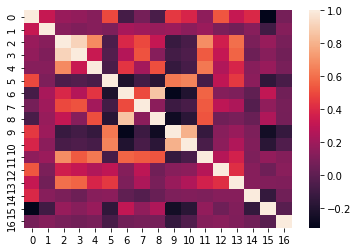

In [16]:
import seaborn as sns
sns.heatmap(df_scaled.corr())

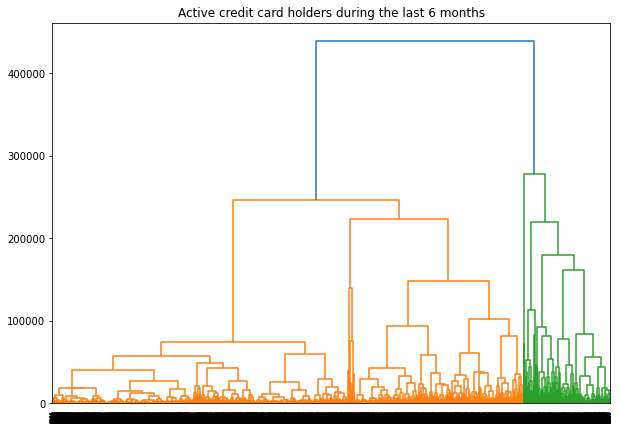

In [17]:
plt.figure(figsize=(10,7))
plt.title("Active credit card holders during the last 6 months")
dend=shc.dendrogram(shc.linkage(df,method="ward"))

In [45]:
df=df_normalized

# k=3

In [46]:
model=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(df_normalized )

In [47]:
agglomerative=pd.DataFrame(clust_labels)
print (agglomerative)
agglomerative.value_counts()

      0
0     0
1     0
2     0
3     0
4     0
...  ..
8945  0
8946  0
8947  0
8948  0
8949  0

[8950 rows x 1 columns]


0    4610
1    3005
2    1335
dtype: int64

Text(0, 0.5, ' INSTALLMENTS_PURCHASES')

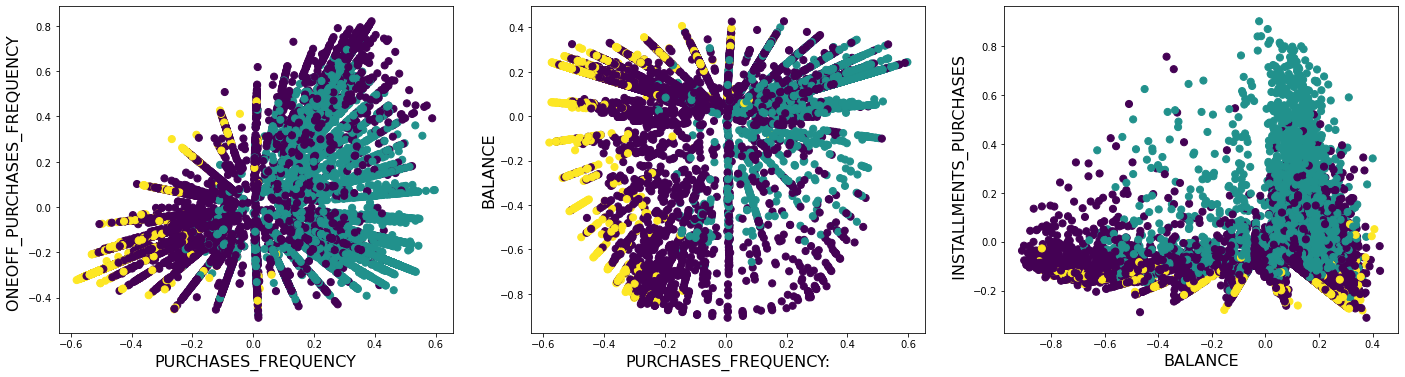

<Figure size 432x288 with 0 Axes>

In [48]:
f, axes = plt.subplots(ncols=3, figsize=(24,6))
fig =plt.figure()
ax=axes[0]
scatter = ax.scatter (df[6] , df[7] , c= agglomerative[0], s=50)
axes[0].set_xlabel("PURCHASES_FREQUENCY", fontsize = 16)
axes[0].set_ylabel("ONEOFF_PURCHASES_FREQUENCY ", fontsize = 16)
ax=axes[1]
scatter = ax.scatter (df[6] , df[1] , c= agglomerative[0], s=50)
axes[1].set_xlabel("PURCHASES_FREQUENCY:", fontsize = 16)
axes[1].set_ylabel("BALANCE", fontsize = 16)
ax=axes[2]
scatter = ax.scatter (df[1] , df[4] , c= agglomerative[0], s=50)
axes[2].set_xlabel("BALANCE", fontsize = 16)
axes[2].set_ylabel(" INSTALLMENTS_PURCHASES", fontsize = 16)

# k=4

In [49]:
model=AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(df_normalized )

In [50]:
agglomerative=pd.DataFrame(clust_labels)
print (agglomerative)
agglomerative.value_counts()

      0
0     1
1     0
2     1
3     1
4     1
...  ..
8945  0
8946  0
8947  0
8948  0
8949  0

[8950 rows x 1 columns]


3    3005
1    2336
0    2274
2    1335
dtype: int64

Text(0, 0.5, ' INSTALLMENTS_PURCHASES')

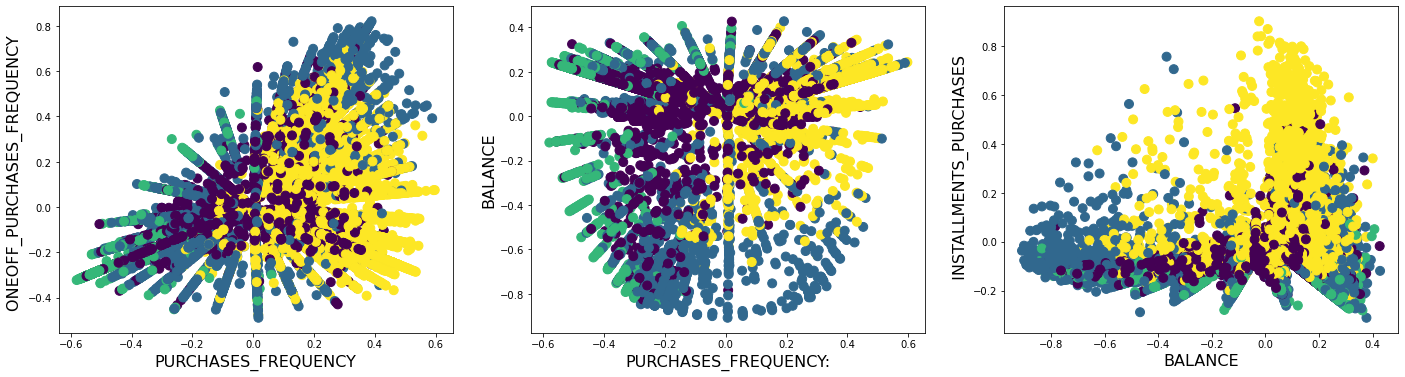

<Figure size 432x288 with 0 Axes>

In [51]:
f, axes = plt.subplots(ncols=3, figsize=(24,6))
fig =plt.figure()
ax=axes[0]
scatter = ax.scatter (df[6] , df[7] , c= agglomerative[0], s=80)
axes[0].set_xlabel("PURCHASES_FREQUENCY", fontsize = 16)
axes[0].set_ylabel("ONEOFF_PURCHASES_FREQUENCY ", fontsize = 16)
ax=axes[1]
scatter = ax.scatter (df[6] , df[1] , c= agglomerative[0], s=80)
axes[1].set_xlabel("PURCHASES_FREQUENCY:", fontsize = 16)
axes[1].set_ylabel("BALANCE", fontsize = 16)
ax=axes[2]
scatter = ax.scatter (df[1] , df[4] , c= agglomerative[0], s=80)
axes[2].set_xlabel("BALANCE", fontsize = 16)
axes[2].set_ylabel(" INSTALLMENTS_PURCHASES", fontsize = 16)

In [59]:
df_t=df[[6,7]]

In [60]:
def kmeans_test(k):
    kmeans=KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_t)
    kmeans.predict(df_t)
    print(kmeans.cluster_centers_) 
    labels=pd.DataFrame(kmeans.labels_)
    df_t["label"]=labels
    print(labels)
    print(pd.Series(kmeans.labels_).value_counts())
    return kmeans.cluster_centers_  

In [61]:
cluster_centers_=kmeans_test(3)
print(cluster_centers_.shape)

[[ 0.27678041 -0.15551459]
 [-0.3270265  -0.1651911 ]
 [ 0.22128475  0.43714208]]
      0
0     1
1     1
2     2
3     1
4     1
...  ..
8945  0
8946  0
8947  0
8948  1
8949  2

[8950 rows x 1 columns]
1    4278
0    2742
2    1930
dtype: int64
(3, 2)


<ipython-input-60-807095eb837f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t["label"]=labels


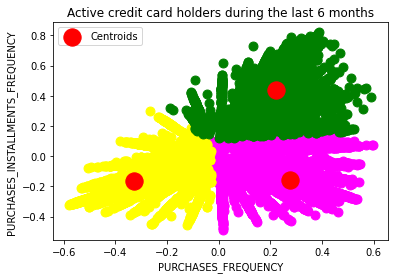

In [56]:
plt.scatter(df_t[6][df_t.label == 0],          
            df_t[7][df_t.label == 0],s=80,c='magenta')
plt.scatter(df_t[6][df_t.label == 1],
           df_t[7][df_t.label == 1],s=80,c='yellow')
plt.scatter(df_t[6][df_t.label == 2],
           df_t[7][df_t.label == 2],s=80,c='green')

plt.scatter(cluster_centers_[:, 0],cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.title('Active credit card holders during the last 6 months')
plt.xlabel('PURCHASES_FREQUENCY')
plt.ylabel('PURCHASES_INSTALLMENTS_FREQUENCY ')
plt.legend()
plt.show()

In [62]:
print(df_t)

             6         7  label
0    -0.343854 -0.289353      1
1    -0.341413 -0.189648      1
2     0.359794  0.757488      2
3    -0.423316 -0.166684      1
4    -0.428679 -0.168795      1
...        ...       ...    ...
8945  0.252800 -0.135108      0
8946  0.258881 -0.138358      0
8947  0.181205 -0.143904      0
8948 -0.253049 -0.140563      1
8949  0.088403  0.313134      2

[8950 rows x 3 columns]


In [63]:
df_t=df_t.drop("label", axis=1)

In [65]:
cluster_centers_=kmeans_test(4)
cluster_centers_.shape

[[-1.51830103e-01 -8.80339371e-02  3.00000000e+00]
 [ 3.22910739e-01 -1.52574034e-01 -1.55431223e-15]
 [-4.31490753e-01 -2.28549371e-01  1.00000000e+00]
 [ 2.30304099e-01  4.53192527e-01  2.00000000e+00]]
      0
0     2
1     2
2     3
3     2
4     2
...  ..
8945  1
8946  1
8947  1
8948  0
8949  3

[8950 rows x 1 columns]
0    2411
2    2372
1    2346
3    1821
dtype: int64


(4, 3)

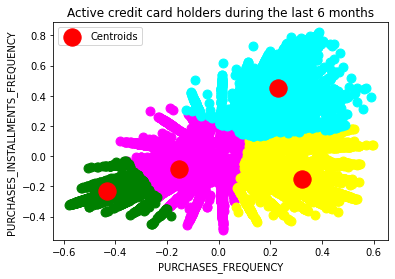

In [66]:
plt.scatter(df_t[6][df_t.label == 0],          
            df_t[7][df_t.label == 0],s=80,c='magenta')
plt.scatter(df_t[6][df_t.label == 1],
           df_t[7][df_t.label == 1],s=80,c='yellow')
plt.scatter(df_t[6][df_t.label == 2],
           df_t[7][df_t.label == 2],s=80,c='green')
plt.scatter(df_t[6][df_t.label == 3], 
           df_t[7][df_t.label == 3],s=80,c='cyan')

plt.scatter(cluster_centers_[:, 0], cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.title('Active credit card holders during the last 6 months')
plt.xlabel('PURCHASES_FREQUENCY')
plt.ylabel('PURCHASES_INSTALLMENTS_FREQUENCY ')
plt.legend()
plt.show()

In [67]:
df_t=df_t.drop("label", axis=1)

In [69]:
cluster_centers_=kmeans_test(5)

[[ 0.28845495  0.57977909  0.        ]
 [ 0.15987386  0.24469308  3.        ]
 [-0.17609374 -0.10715183  1.        ]
 [-0.44168519 -0.2343258   4.        ]
 [ 0.324286   -0.17652132  2.        ]]
      0
0     3
1     3
2     0
3     3
4     3
...  ..
8945  4
8946  4
8947  4
8948  2
8949  1

[8950 rows x 1 columns]
2    2403
3    2195
4    2168
1    1190
0     994
dtype: int64


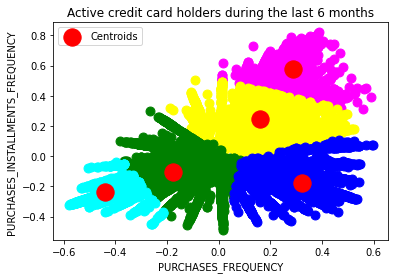

In [70]:
plt.scatter(df_t[6][df_t.label == 0],          
            df_t[7][df_t.label == 0],s=80,c='magenta')
plt.scatter(df_t[6][df_t.label == 1],
           df_t[7][df_t.label == 1],s=80,c='yellow')
plt.scatter(df_t[6][df_t.label == 2],
           df_t[7][df_t.label == 2],s=80,c='green')
plt.scatter(df_t[6][df_t.label == 3], 
           df_t[7][df_t.label == 3],s=80,c='cyan')
plt.scatter(df_t[6][df_t.label == 4], 
           df_t[7][df_t.label == 4],s=80,c='BLUE')

plt.scatter(cluster_centers_[:, 0],cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.title('Active credit card holders during the last 6 months')
plt.xlabel('PURCHASES_FREQUENCY')
plt.ylabel('PURCHASES_INSTALLMENTS_FREQUENCY ')
plt.legend()
plt.show()

# Choosing best k value

In [74]:
Sum_of_squared_distance=[]
=range(1,15)
for i in k: 
    KM= KMeans(n_clusters=i)
    KM=KM.fit(df)
    Sum_of_squared_distance.append(KM.inertia_)

In [75]:
plt.plot(K,Sum_of_squared_distance,'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distance')
plt.show()

NameError: name 'K' is not defined

# Best k value = 5